# **Project:** Network Attack Detection

**Data set:** UNSW-NB15 Dataset

**Source of Data set:**  https://research.unsw.edu.au/projects/unsw-nb15-dataset

**Information about Data set**
> 1. Training set = 82,332 records 
2. Test set = 175,341 records
3. Features = 49 mentioned here. https://cloudstor.aarnet.edu.au/plus/apps/onlyoffice/s/2DhnLGDdEECo4ys?fileId=206777051

# What is Intrusion Detection System?

Intrusion Detection System (IDS) is a system that monitors network traffic for suspicious activity and issues alerts when such activity is discovered.

**Detection Methods of IDS:**

**1. Signature-based Method:**

It detects the attacks on the basis of the

> 1.1. specific patterns such as number of bytes/ number of 1’s or number of 0’s in the network traffic. 

> 1.2. Known malicious instruction sequence that is used by the malware.

**2. Anomaly-detection Method:**

It detects the attacks using

> 2.1. Machine learning. It creates a trustful activity model and anything coming is compared with that model and it is declared suspicious if it is not found in model 

**Which method is better?**

*Anomaly-detection Method* method is more accepted in comparison to signature-based IDS because the machine learning models can be trained according to the applications and hardware configurations.

















# Problem Statement

Network security is of prime importance these days. We need to protect our data and systems from attackers. A network attack attempts to gain unauthorized access to the network and take advantage of the vulnerablites of the network. 
In this project, we will predict the network attack that is happening over the network using the above mentioned dataset. 

The type of attacks investigated are: 
1. Fuzzers
2. Analysis
3. Backdoors
4. DoS
5. Exploits
6. Generic
7. Reconnaissance
8. Shellcode 
9. Worms 

In [ ]:
import pandas as pd   #for dataframes
import numpy as np  #for array

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from  matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder  #for encoding of categorical columns

Reading the Dataset csv using the link of another git hub repo. 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving UNSW_NB15_testing-set.csv to UNSW_NB15_testing-set (3).csv
Saving UNSW_NB15_training-set.csv to UNSW_NB15_training-set (1).csv


In [ ]:
train = pd.read_csv('UNSW_NB15_training-set.csv')
test = pd.read_csv('UNSW_NB15_testing-set.csv')
combine = train.append(test)

In [ ]:
combine.shape

(257673, 45)

#**Prepare the dataset**

---



# Dropping unnecessary columns

One such column is 'id', 'attack_cat'

In [ ]:
combine = combine.drop(['id', 'attack_cat'],axis=1)
combine.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0


When we concatenate two DataFrames then we need to reset the index of the DataFrame. If the dataframe has a multiindex, this method can remove one or more levels. Otherwise if we don't do this, we get an error - "InvalidIndexError: Reindexing only valid with uniquely valued Index objects" 

In [ ]:
combine = combine.reset_index(drop=True)

# Check for Missing Values

Since the dataset was clean, we donot have any missing values as seen below.

In [ ]:
# checking for null values
combine.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
label                0
dtype: int6

Getting name of all the columns of the dataset to see what should be the expected datatype of each column

In [ ]:
combine.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [ ]:
# see if binary columns are really binary
for col in 'is_sm_ips_ports', 'is_ftp_login':
    print(combine[col].value_counts())
    print()

0    253995
1      3678
Name: is_sm_ips_ports, dtype: int64

0    254428
1      3219
4        16
2        10
Name: is_ftp_login, dtype: int64



The col "is_ftp_login" has wrong values like 2 and 4. It should only have binary values like 0 and 1. If the ftp session is accessed by user using correct username and password then 1, otherwise 0. We need to fix this.

Therefore, we are replacing all the values other than 0 and 1 from these two columns.

In [ ]:
combine['is_ftp_login'] = np.where(combine['is_ftp_login']>1, 1, combine['is_ftp_login'])

In [ ]:
combine['is_ftp_login'].value_counts()

0    254428
1      3245
Name: is_ftp_login, dtype: int64

In [ ]:
combine['service'].value_counts()

-           141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

In the feature "service" we see that we have "-". We need to replace that as well.

In [ ]:
# removing all the "-" and replacing those with "None"
combine['service'] = combine['service'].apply(lambda x:"None" if x=="-" else x)

In [ ]:
combine['service'].value_counts()

None        141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

#View the One hot encoding preprocessing file here

Since the one hot encoding created more that 150 features, there was chance of overfitting so we proceeded with Label encoding.

https://github.com/divyaKh/CMPE255Project/blob/main/1.Dataset/Dataset_and_its_Cleaning.ipynb

# Label encoding



In our dataset we have few categorical columns with text data. But when we apply ML models to our data, then we need every data to be numerical. 

So we have to convert categorical columns to numerical columns in some way. We will use label encoder where we will assign 1 if the value is present for the row and rest of the columns will be 0.

In [40]:
from sklearn.preprocessing import LabelEncoder

categorical = []
for col in combine.columns:
    if combine[col].dtype == 'object':
             categorical.append(col)

for col in categorical:
        le = LabelEncoder()
        le.fit(list(combine[col].astype(str).values) + list(combine[col].astype(str).values))
        combine[col] = le.transform(list(combine[col].astype(str).values))

combine

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,119,0,5,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
1,0.000008,119,0,5,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
2,0.000005,119,0,5,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0
3,0.000006,119,0,5,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
4,0.000010,119,0,5,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,119,2,5,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,1
257669,0.505762,113,0,4,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.98057,3721.068786,120.177727,255,3518776216,3453092386,255,0.09944,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,1
257670,0.000009,119,2,5,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,1
257671,0.000009,119,2,5,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,1


#More EDA can be seen here: https://github.com/divyaKh/CMPE255Project/blob/main/2.EDA/Exploratory_Data_Analysis.ipynb

#**Feature importances on combined dataset**



Feature importance using Tree based classifier. 




##**CART classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

importance_dict = pd.DataFrame()

clf = DecisionTreeClassifier()
X=combine.drop(columns='label')
y=combine['label']
clf.fit(X, y)
feature_importance = clf.feature_importances_
importance_dict['combined'] =  feature_importance
importance_dict['combined']



0     0.007171
1     0.001695
2     0.002500
3     0.000700
4     0.005551
5     0.003124
6     0.037592
7     0.017116
8     0.006831
9     0.537763
10    0.000050
11    0.010245
12    0.008500
13    0.002633
14    0.000391
15    0.009656
16    0.006263
17    0.006779
18    0.006864
19    0.000000
20    0.009965
21    0.010757
22    0.000017
23    0.009196
24    0.066429
25    0.008523
26    0.066143
27    0.011790
28    0.000162
29    0.003007
30    0.018400
31    0.000246
32    0.005017
33    0.004128
34    0.003324
35    0.036776
36    0.000056
37    0.000124
38    0.005006
39    0.007132
40    0.062378
41    0.000000
Name: combined, dtype: float64

Feature: 0, Score: 0.00716
Feature: 1, Score: 0.00161
Feature: 2, Score: 0.00260
Feature: 3, Score: 0.00064
Feature: 4, Score: 0.00559
Feature: 5, Score: 0.00297
Feature: 6, Score: 0.03735
Feature: 7, Score: 0.01749
Feature: 8, Score: 0.00701
Feature: 9, Score: 0.53777
Feature: 10, Score: 0.00015
Feature: 11, Score: 0.01027
Feature: 12, Score: 0.00879
Feature: 13, Score: 0.00267
Feature: 14, Score: 0.00038
Feature: 15, Score: 0.00930
Feature: 16, Score: 0.00629
Feature: 17, Score: 0.00691
Feature: 18, Score: 0.00724
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.01042
Feature: 21, Score: 0.01065
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00861
Feature: 24, Score: 0.06668
Feature: 25, Score: 0.00839
Feature: 26, Score: 0.06603
Feature: 27, Score: 0.01149
Feature: 28, Score: 0.00405
Feature: 29, Score: 0.00310
Feature: 30, Score: 0.01832
Feature: 31, Score: 0.00022
Feature: 32, Score: 0.00508
Feature: 33, Score: 0.00395
Feature: 34, Score: 0.00339
Feature: 35, Score: 0.03680
Fe

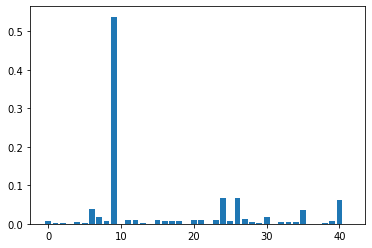

In [ ]:
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Though the 41st feature has no score, we are not dropping it because in the correlation analysis, we saw that it has moderate correlation with the label. From this graph we can infer that the 9th feature ie, rate is most important wrt to label.


In [29]:
combine

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0
3,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,1
257669,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.98057,3721.068786,120.177727,255,3518776216,3453092386,255,0.09944,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,1
257670,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,1
257671,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,1


#Plot lables

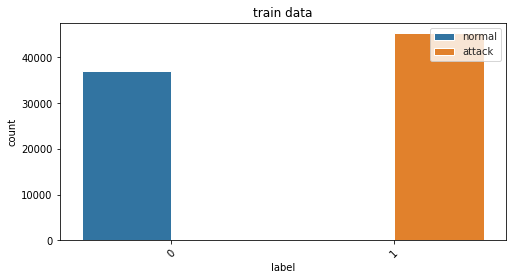

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

combine['label'].nunique()
def col_countplot(col, train_data=train):
    """
    This function plots countplot of a given feature for train dataset
    """
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set_style('whitegrid')
    # countplot of the given column
    ax = sns.countplot(x=col, hue='label', data=train_data)
    ax.legend(loc="upper right", labels=('normal', 'attack'))
    ax.set_title("train data")
    plt.xticks(rotation=45)
    plt.show()
col_countplot('label')

**Since this is not an imbalanced data. We have taken it as it is. If it would have been an imbalanced data. We would have used sampling techniques like SMOTE(S ynthetic M inority O versampling Te chnique).**

Here, The count of unique values of labels are not varying largely, So, that is why we have considered it as a balanced data.


In [32]:
combine.shape

(257673, 43)

#Preprocessing : 

In [41]:
def removeHcorrFeature(percentage,X):
  # Selecting all the features with high correlation values with other features
  # Refer: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
  corr_matrix = X.corr().abs()

  # Select upper triangle of correlation matrix
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

  # Find index of feature columns with correlation greater than 0.9
  o_drop = [column for column in upper.columns if any(upper[column] > percentage)]
  print(o_drop)
  return o_drop

In [42]:
def applyPCA(X, n_com):
   #print(data_set)
   pca = PCA(n_components=n_com).fit(X)
   X_train_pca = pca.transform(X)
   print(pca.n_components_)
   return X_train_pca

**Appying PCA reduces the number of features to 29**

In [43]:
def applyMinMax(data):  
# scale features
  scaler = MinMaxScaler()
  model=scaler.fit(data)
  scaled_data=model.transform(data)
  return scaled_data
  #print(data_set)

In [44]:
def applyStandardScaler(data):
  scaler = StandardScaler()
  model = scaler.fit(data)
  scaled_data = model.transform(data)
  #print(data_set)
  return scaled_data

In [45]:
combine.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

**Calling function and preparing the dataset**

**Minmax scaling**

In [61]:
X_mm=combine.drop(columns='label')    
y_mm=combine['label']
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_mm = applyMinMax(X_mm)


Apply MinMax scaler


**Standard scaling**

In [62]:
X_ss=combine.drop(columns='label')    
y_ss=combine['label']
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply Standard scaler")
X_ss = applyStandardScaler(X_ss)

Apply Standard scaler


**Standard scaling + correlation**

In [63]:
X_ss_corr=combine.drop(columns='label')    
y_ss_corr=combine['label']
n_com=0.99
cols = X_ss_corr.columns
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_ss_corr = applyStandardScaler(X_ss_corr)
X_ss_corr = pd.DataFrame(X_ss_corr, columns =cols)
print("Remove highly correlated features with each other")
col = removeHcorrFeature(n_com, X_ss_corr)
print(col)
X_ss_corr.drop(X_ss_corr[col], axis=1, inplace=True)
X_ss_corr.shape

Apply MinMax scaler
Remove highly correlated features with each other
['sloss', 'dloss', 'ct_ftp_cmd']
['sloss', 'dloss', 'ct_ftp_cmd']


(257673, 39)

Observations: 3 columns have been pruned due to high correlation with other features, other than target.

**MinMax Scaling+ Correlation**

In [64]:
X_mm_corr=combine.drop(columns='label')    
y_mm_corr=combine['label']
n_com=0.99
cols = X_mm_corr.columns
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_mm_corr = applyMinMax(X_mm_corr)
X_mm_corr = pd.DataFrame(X_mm_corr, columns =cols)
print("Remove highly correlated features with each other")
col = removeHcorrFeature(n_com, X_mm_corr)
print(col)
X_mm_corr.drop(X_mm_corr[col], axis=1, inplace=True)
X_mm_corr.shape

Apply MinMax scaler
Remove highly correlated features with each other
['sloss', 'dloss', 'ct_ftp_cmd']
['sloss', 'dloss', 'ct_ftp_cmd']


(257673, 39)

If we keep correlation check for more than 95%, we will lose most of the data. So to optimize the we have taken percentage as 99. we can in correlation matrix here that : sloss, dloss and ct_ftp_cmd are highly correlated to sbytes,dbytes,is_ftp_login repectively. So keeping one of those two column would reduce noise and also, the columns loss, dloss and ct_ftp_cmd  are not adding new information to the data. Hence, We will be dropping those when applying correlation analysis dropping 'sloss', 'dloss', 'ct_ftp_cmd'

**Apply Standard scaler+PCA**

**We want to capture 99% of the variance of the dataset, and also reduced features so, applying PCA.**

In [56]:
from sklearn.decomposition import PCA
X_pca=combine.drop(columns='label')    
y_pca=combine['label']
n_com=0.99
cols = X_pca.columns
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply Standard scaler")
X_pca = applyStandardScaler(X_pca)
X_pca = pd.DataFrame(X_pca, columns =cols)
X_pca = applyPCA(X_pca, n_com)
X_pca.shape

Apply Standard scaler
29


(257673, 29)

**OBSERVATION:**After apply PCA the features got reduces to 29. That means that 
number of features that captures 99% variance has been reduced to 29 from 42.

**Applying standard scaler is an important steps before applying PCA.**

**Note : 'X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr.

X= the feature set before applying any preprocessing

X_pca= The feature set after applying Standard scaling and PCA.

X_mm_corr = The feature set after applying MinMax scaling and correlation analysis

X_mm= The feature set after applying MinMax scaling

X_ss= The feature set after applying standard scaling

X_ss_corr = The feature set after applying standard scaling and correaltion analysis.

y= the target set before applying any preprocessing

y_pca= The target set after applying Standard scaling and PCA.

y_mm_corr = The target set after applying MinMax scaling and correlation analysis

y_mm= The target set after applying MinMax scaling

y_ss= The target set after applying standard scaling

y_ss_corr = The target set after applying standard scaling and correaltion analysis.



**XGBoost**



In [65]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
# check accuracy score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import time

X= X
y= y
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27920
           1       0.95      0.95      0.95     49382

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25396  2524]
 [ 2645 46737]]
XGBoost model accuracy score: 0.9331
f1_score: 0.9475989173078677
Time taken to complete:
28.324170691999996


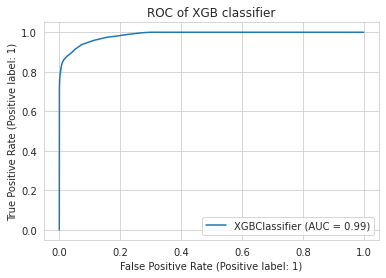

-----------------------------------------------------------------------------------------------------------------
X= X_pca
y= y_pca
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     27988
           1       0.89      0.97      0.93     49314

    accuracy                           0.91     77302
   macro avg       0.91      0.88      0.89     77302
weighted avg       0.91      0.91      0.90     77302

[[22270  5718]
 [ 1598 47716]]
XGBoost model accuracy score: 0.9054
f1_score: 0.928796667575038
Time taken to complete:
39.860720603000004


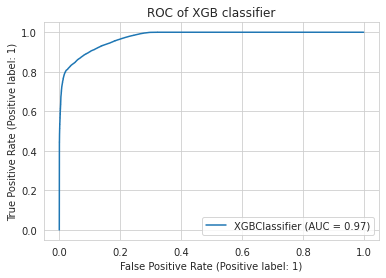

-----------------------------------------------------------------------------------------------------------------
X= X_mm_corr
y= y_mm_corr
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     27831
           1       0.95      0.95      0.95     49471

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25424  2407]
 [ 2716 46755]]
XGBoost model accuracy score: 0.9337
f1_score: 0.9480599799255828
Time taken to complete:
27.183490148000033


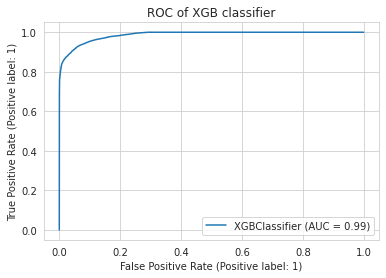

-----------------------------------------------------------------------------------------------------------------
X= X_mm
y= y_mm
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     28028
           1       0.95      0.95      0.95     49274

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25550  2478]
 [ 2589 46685]]
XGBoost model accuracy score: 0.9345
f1_score: 0.9485254528276968
Time taken to complete:
28.44397615899993


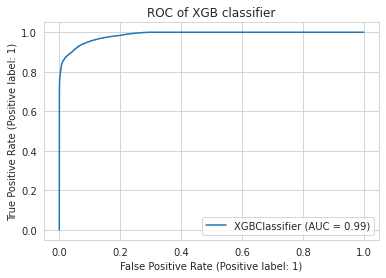

-----------------------------------------------------------------------------------------------------------------
X= X_ss
y= y_ss
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27887
           1       0.95      0.95      0.95     49415

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25382  2505]
 [ 2598 46817]]
XGBoost model accuracy score: 0.9340
f1_score: 0.9483172468274305
Time taken to complete:
28.04575884899998


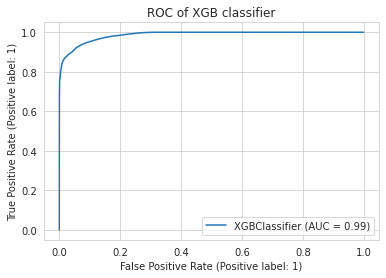

-----------------------------------------------------------------------------------------------------------------
X= X_ss_corr
y= y_ss_corr
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     27914
           1       0.95      0.94      0.95     49388

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25440  2474]
 [ 2762 46626]]
XGBoost model accuracy score: 0.9323
f1_score: 0.9468361627812525
Time taken to complete:
27.083525888000054


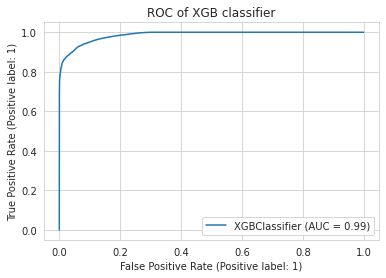

-----------------------------------------------------------------------------------------------------------------


In [83]:
acc_xgb=[]
f1_xgb=[]
dataset1 = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
j1=['y','y_pca','y_mm_corr','y_mm','y_ss','y_ss_corr']
dataset = [X,X_pca,X_mm_corr,X_mm,X_ss,X_ss_corr]
j=[y,y_pca,y_mm_corr,y_mm,y_ss,y_ss_corr]
for i in range(0,len(dataset)): 
  start = time.process_time()
  # your code here
  print("X=",dataset1[i])
  print("y=",j1[i])
  X_train, X_test, y_train, y_test = train_test_split(dataset[i], j[i], test_size=0.3)
  model = xgb.XGBClassifier()
  model.fit(X_train, y_train)
  predicted_xgb_y = model.predict(X_test)
  print(metrics.classification_report(y_test, predicted_xgb_y))
  print(metrics.confusion_matrix(y_test, predicted_xgb_y))
  acc_xgb.append(accuracy_score(y_test, predicted_xgb_y))
  print('XGBoost model accuracy score: {0:0.4f}'. format(acc_xgb[-1]))
  f1_xgb.append(f1_score(y_test, predicted_xgb_y))
  print("f1_score:",f1_xgb[-1])
  print("Time taken to complete:")
  print(time.process_time() - start)
  #plot ROC curve
  metrics.plot_roc_curve(model, X_test, y_test)
  plt.title("ROC of XGB classifier")
  plt.show()
  print("-----------------------------------------------------------------------------------------------------------------")

In [90]:
import matplotlib.pyplot as plt
def displayAnalysisGraphs(acc,f1):
  plt.plot(list1,acc)
  for i in range(len(list1)):
    acc[i]=float('{:,.3f}'.format(acc[i]))
    plt.annotate(str(acc[i]), xy=(list1[i], acc[i]))
  plt.ylabel("Accuracy")
  plt.title("Accuracy for dataset after different preprocessing techniques")
  plt.show()
  plt.plot(list1,f1)
  for i in range(len(list1)):
    f1[i]=float('{:,.3f}'.format(f1[i]))
    plt.annotate(str(f1[i]), xy=(list1[i], f1[i]))
  plt.ylabel("F1 score")
  plt.title("F1 scores for dataset after different preprocessing techniques")
  plt.show()

FOR XGBOOST


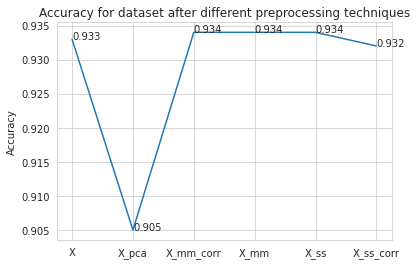

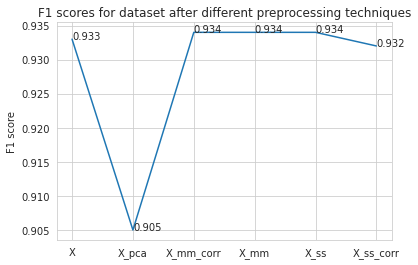

In [91]:
list1 = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
print("FOR XGBOOST")
displayAnalysisGraphs(acc_xgb,f1_xgb)

**OBSERVATION: The best accuracy for XGBoost is for Standard scaling and correlation analysis. The F1 score is also good for the same**

1)F1 SCORE  decreased with applying PCA, acuracy is also less.

2)If we see for the rest of the cases the accuracy is 93%.

3)The maximum time for fitting PCA data and predicting is high as compared to fitting data after applying other preprocessing technique. 

**GB Gradient**

X= X
y= y
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     27995
           1       0.94      0.95      0.95     49307

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25188  2807]
 [ 2310 46997]]
Gradient model accuracy score: 0.9338
f1_score: 0.9483710183531596
Time taken to complete:
88.19717984599993


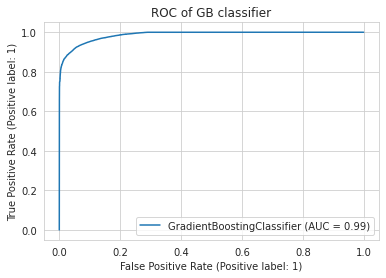

-----------------------------------------------------------------------------------------------------------------
X= X_pca
y= y_pca
              precision    recall  f1-score   support

           0       0.93      0.81      0.86     27959
           1       0.90      0.96      0.93     49343

    accuracy                           0.91     77302
   macro avg       0.91      0.88      0.90     77302
weighted avg       0.91      0.91      0.91     77302

[[22537  5422]
 [ 1781 47562]]
Gradient model accuracy score: 0.9068
f1_score: 0.9296080213433405
Time taken to complete:
222.1521544850001


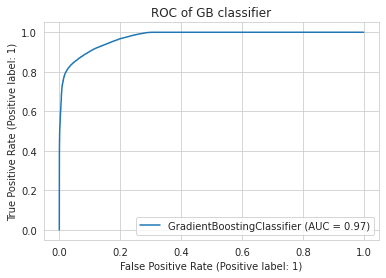

-----------------------------------------------------------------------------------------------------------------
X= X_mm_corr
y= y_mm_corr
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     28165
           1       0.94      0.95      0.95     49137

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25330  2835]
 [ 2284 46853]]
Gradient model accuracy score: 0.9338
f1_score: 0.9482013660511004
Time taken to complete:
84.85338641099997


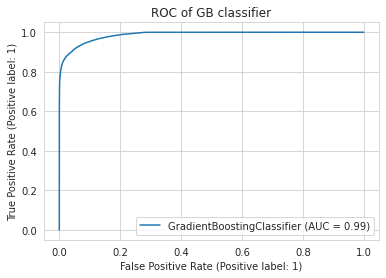

-----------------------------------------------------------------------------------------------------------------
X= X_mm
y= y_mm
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     27859
           1       0.94      0.95      0.95     49443

    accuracy                           0.93     77302
   macro avg       0.93      0.92      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[24963  2896]
 [ 2279 47164]]
Gradient model accuracy score: 0.9331
f1_score: 0.9479915178436831
Time taken to complete:
102.11078353700009


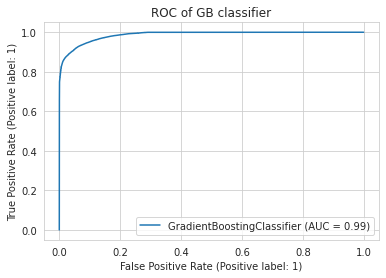

-----------------------------------------------------------------------------------------------------------------
X= X_ss
y= y_ss
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     27767
           1       0.94      0.95      0.95     49535

    accuracy                           0.93     77302
   macro avg       0.93      0.92      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[24857  2910]
 [ 2270 47265]]
Gradient model accuracy score: 0.9330
f1_score: 0.9480493430949755
Time taken to complete:
103.77570440599993


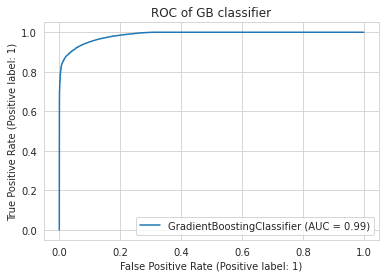

-----------------------------------------------------------------------------------------------------------------
X= X_ss_corr
y= y_ss_corr
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     28082
           1       0.94      0.95      0.95     49220

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25260  2822]
 [ 2345 46875]]
Gradient model accuracy score: 0.9332
f1_score: 0.9477642872307086
Time taken to complete:
84.15645488399991


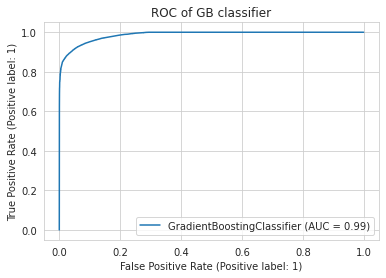

-----------------------------------------------------------------------------------------------------------------


In [93]:
acc_gb=[]
f1_gb=[]
dataset1 = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
j1=['y','y_pca','y_mm_corr','y_mm','y_ss','y_ss_corr']
dataset = [X,X_pca,X_mm_corr,X_mm,X_ss,X_ss_corr]
j=[y,y_pca,y_mm_corr,y_mm,y_ss,y_ss_corr]
for i in range(0,len(dataset)): 
  start = time.process_time()
  print("X=",dataset1[i])
  print("y=",j1[i])
  X_train, X_test, y_train, y_test = train_test_split(dataset[i], j[i], test_size=0.3)
  model = GradientBoostingClassifier()
  model.fit(X_train, y_train)
  predicted_gb_y = model.predict(X_test)
  print(metrics.classification_report(y_test, predicted_gb_y))
  print(metrics.confusion_matrix(y_test, predicted_gb_y))
  acc_gb.append(accuracy_score(y_test, predicted_gb_y))
  print('Gradient model accuracy score: {0:0.4f}'. format(acc_gb[-1]))
  f1_gb.append(f1_score(y_test, predicted_gb_y))
  print("f1_score:",f1_gb[-1])
  print("Time taken to complete:")
  print(time.process_time() - start)
  #plot ROC curve
  metrics.plot_roc_curve(model, X_test, y_test)
  plt.title("ROC of GB classifier")
  plt.show()
  print("-----------------------------------------------------------------------------------------------------------------")

FOR GB Gradient


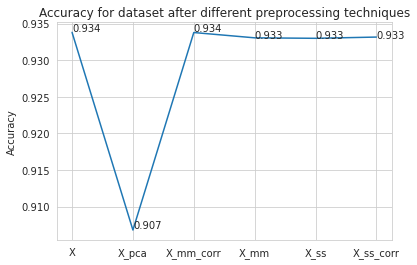

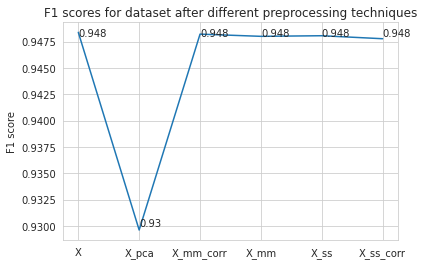

In [94]:
list1 = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
print("FOR GB Gradient")
displayAnalysisGraphs(acc_gb,f1_gb)

1)Time take to fit and predict using PCA preprocessing is high as compared to other models build from differnt preprocessing techniques.
2)Here the standard scaling and correlation, minmax scaling and standard scaling preprocessing steps yeilds the same result for the model.
3)For X_PCA:GB tree, F1 score is high than accuracy score.




**Decision trees**

X= X
y= y
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     28145
           1       0.95      0.95      0.95     49157

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25715  2430]
 [ 2561 46596]]
Decision trees model accuracy score: 0.9354
f1_score: [0.9491663526272369]
Time taken to complete:
89.02674343900003


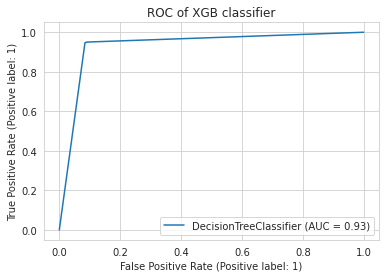

-----------------------------------------------------------------------------------------------------------------
X= X_pca
y= y_pca
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     27875
           1       0.93      0.93      0.93     49427

    accuracy                           0.91     77302
   macro avg       0.90      0.91      0.90     77302
weighted avg       0.91      0.91      0.91     77302

[[24501  3374]
 [ 3404 46023]]
Decision trees model accuracy score: 0.9123
f1_score: [0.9491663526272369, 0.9314134218408484]
Time taken to complete:
100.23392641300006


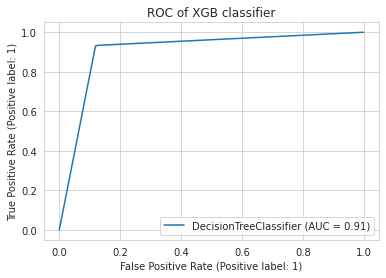

-----------------------------------------------------------------------------------------------------------------
X= X_mm_corr
y= y_mm_corr
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27713
           1       0.95      0.95      0.95     49589

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25315  2398]
 [ 2522 47067]]
Decision trees model accuracy score: 0.9364
f1_score: [0.9491663526272369, 0.9314134218408484, 0.9503301229632322]
Time taken to complete:
103.83809941599998


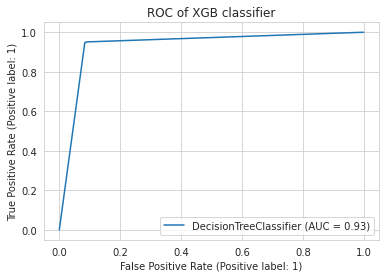

-----------------------------------------------------------------------------------------------------------------
X= X_mm
y= y_mm
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27877
           1       0.95      0.95      0.95     49425

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25314  2563]
 [ 2424 47001]]
Decision trees model accuracy score: 0.9355
f1_score: [0.9491663526272369, 0.9314134218408484, 0.9503301229632322, 0.9496206649223651]
Time taken to complete:
107.58424160100003


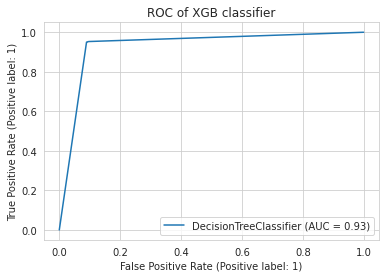

-----------------------------------------------------------------------------------------------------------------
X= X_ss
y= y_ss
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27884
           1       0.95      0.95      0.95     49418

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25436  2448]
 [ 2436 46982]]
Decision trees model accuracy score: 0.9368
f1_score: [0.9491663526272369, 0.9314134218408484, 0.9503301229632322, 0.9496206649223651, 0.950590806086112]
Time taken to complete:
111.21111233500005


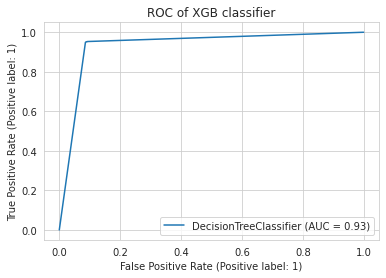

-----------------------------------------------------------------------------------------------------------------
X= X_ss_corr
y= y_ss_corr
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27978
           1       0.95      0.95      0.95     49324

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25516  2462]
 [ 2469 46855]]
Decision trees model accuracy score: 0.9362
f1_score: [0.9491663526272369, 0.9314134218408484, 0.9503301229632322, 0.9496206649223651, 0.950590806086112, 0.9500106446609422]
Time taken to complete:
114.68744422600003


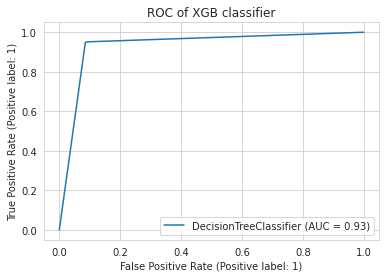

-----------------------------------------------------------------------------------------------------------------


In [96]:
acc_dt=[]
f1_dt=[]
dataset1 = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
j1=['y','y_pca','y_mm_corr','y_mm','y_ss','y_ss_corr']
dataset = [X,X_pca,X_mm_corr,X_mm,X_ss,X_ss_corr]
j=[y,y_pca,y_mm_corr,y_mm,y_ss,y_ss_corr]
for i in range(0,len(dataset)): 
  print("X=",dataset1[i])
  print("y=",j1[i])
  X_train, X_test, y_train, y_test = train_test_split(dataset[i], j[i], test_size=0.3)
  model = DecisionTreeClassifier()
  model.fit(X_train, y_train)
  predicted_dt_y = model.predict(X_test)
  print(metrics.classification_report(y_test, predicted_dt_y))
  print(metrics.confusion_matrix(y_test, predicted_dt_y))
  acc_dt.append(accuracy_score(y_test, predicted_dt_y))
  print('Decision trees model accuracy score: {0:0.4f}'. format(acc_dt[-1]))
  f1_dt.append(f1_score(y_test, predicted_dt_y))
  print("f1_score:",f1_dt)
  print("Time taken to complete:")
  print(time.process_time() - start)
  #plot ROC curve
  metrics.plot_roc_curve(model, X_test, y_test)
  plt.title("ROC of XGB classifier")
  plt.show()
  print("-----------------------------------------------------------------------------------------------------------------")

FOR Decison Tree


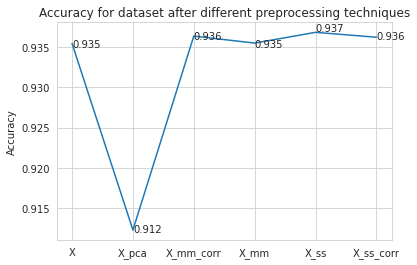

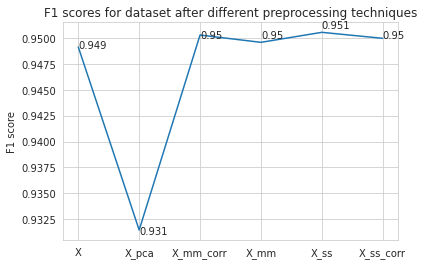

In [97]:
list1 = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
print("FOR Decison Tree")
displayAnalysisGraphs(acc_dt,f1_dt)

1)The time taken to fit and predict the data after applying standard scaling and correaltion analysis is high.

2)The accuracy and F1 score is highest in the X_ss.




**Random forest**

X= X
y= y
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     28006
           1       0.96      0.96      0.96     49296

    accuracy                           0.95     77302
   macro avg       0.94      0.95      0.94     77302
weighted avg       0.95      0.95      0.95     77302

[[10041 17965]
 [17564 31732]]
Random Forest model accuracy score: 0.9491
f1_score: 0.9600584955671329
Time taken to complete:
151.5890534


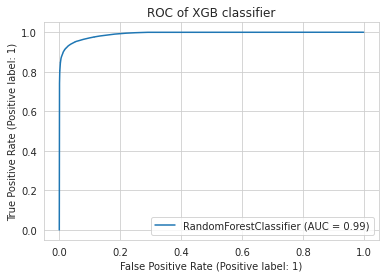

-----------------------------------------------------------------------------------------------------------------
X= X_pca
y= y_pca
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     27968
           1       0.94      0.95      0.95     49334

    accuracy                           0.93     77302
   macro avg       0.93      0.92      0.92     77302
weighted avg       0.93      0.93      0.93     77302

[[ 9969 17999]
 [17636 31698]]
Random Forest model accuracy score: 0.9293
f1_score: 0.9450098142835573
Time taken to complete:
264.011496844


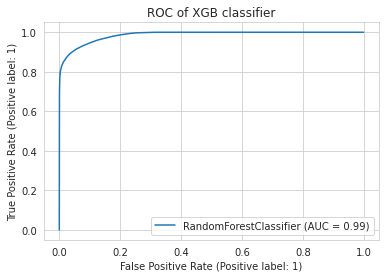

-----------------------------------------------------------------------------------------------------------------
X= X_mm_corr
y= y_mm_corr
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27828
           1       0.96      0.96      0.96     49474

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[ 9928 17900]
 [17677 31797]]
Random Forest model accuracy score: 0.9507
f1_score: 0.9614504666842139
Time taken to complete:
301.6563866470001


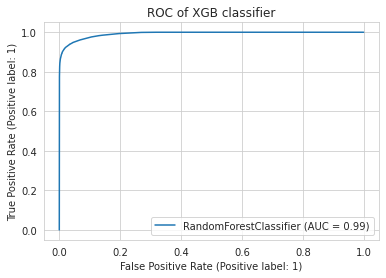

-----------------------------------------------------------------------------------------------------------------
X= X_mm
y= y_mm
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     27712
           1       0.96      0.96      0.96     49590

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[ 9808 17904]
 [17797 31793]]
Random Forest model accuracy score: 0.9513
f1_score: 0.9619368072185678
Time taken to complete:
336.3323928509999


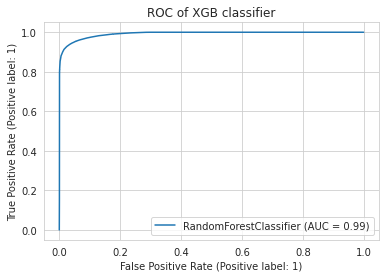

-----------------------------------------------------------------------------------------------------------------
X= X_ss
y= y_ss
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     27759
           1       0.96      0.96      0.96     49543

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[ 9965 17794]
 [17640 31903]]
Random Forest model accuracy score: 0.9506
f1_score: 0.9613882424365071
Time taken to complete:
372.40462441499994


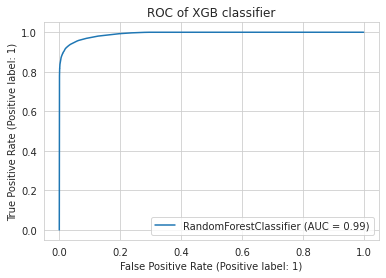

-----------------------------------------------------------------------------------------------------------------
X= X_ss_corr
y= y_ss_corr
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     28173
           1       0.96      0.96      0.96     49129

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[10043 18130]
 [17562 31567]]
Random Forest model accuracy score: 0.9505
f1_score: 0.9609785932721713
Time taken to complete:
412.0070824669999


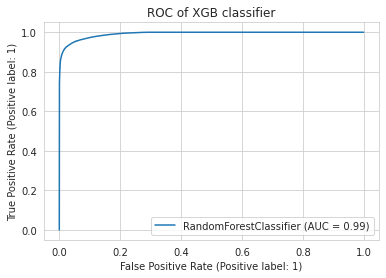

-----------------------------------------------------------------------------------------------------------------


In [98]:
acc_rf=[]
f1_rf=[]
dataset1 = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
j1=['y','y_pca','y_mm_corr','y_mm','y_ss','y_ss_corr']
dataset = [X,X_pca,X_mm_corr,X_mm,X_ss,X_ss_corr]
j=[y,y_pca,y_mm_corr,y_mm,y_ss,y_ss_corr]
for i in range(0,len(dataset)): 
  print("X=",dataset1[i])
  print("y=",j1[i])
  X_train, X_test, y_train, y_test = train_test_split(dataset[i], j[i], test_size=0.3)
  model = RandomForestClassifier()
  model.fit(X_train, y_train)
  predicted_rt_y = model.predict(X_test)
  print(metrics.classification_report(y_test, predicted_rt_y))
  print(metrics.confusion_matrix(y_test, predicted_gb_y))
  acc_rf.append(accuracy_score(y_test, predicted_rt_y))
  print('Random Forest model accuracy score: {0:0.4f}'. format(acc_rf[-1]))
  f1_rf.append(f1_score(y_test,predicted_rt_y))
  print("f1_score:",f1_rf[-1])
  print("Time taken to complete:")
  print(time.process_time() - start)
  #plot ROC curve
  metrics.plot_roc_curve(model, X_test, y_test)
  plt.title("ROC of XGB classifier")
  plt.show()
  print("-----------------------------------------------------------------------------------------------------------------")

FOR RANDOM FOREST


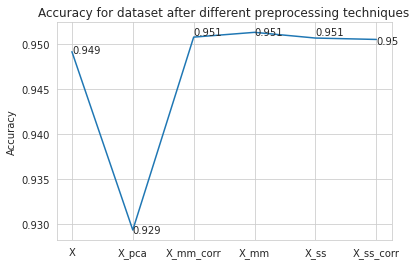

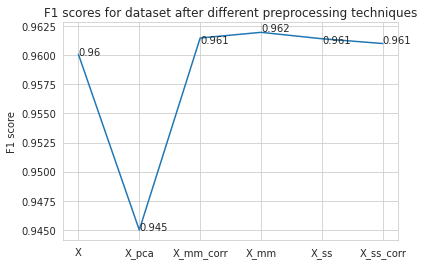

In [99]:
list1 = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
print("FOR RANDOM FOREST")
displayAnalysisGraphs(acc_rf,f1_rf)

1)The random forest classifier has maximum and similar accuracy on X_mm,X_ss,X_mm_corr,X_ss_corr.

2) The overall accuracy and F1 score is less for PCA.

3) The Time taken to fit and predict  the  model for the data :X_ss_corr is the highest.

##Visualize performance of different ML models for different Pre-Processing techniques

In [111]:
def displayComparisonGraphsOfModels(index):
  acc = [acc_rf[index], acc_gb[index], acc_dt[index], acc_xgb[index]]
  list1=["XGB","GB","DT","RT"]
  
  plt.plot(list1,acc)
  for i in range(len(list1)):
    acc[i]=float('{:,.3f}'.format(acc[i]))
    plt.annotate(str(acc[i]), xy=(list1[i], acc[i]))
  plt.title("Accuracy comparison between different ML models")
  plt.ylabel("Accuracy")
  plt.xlabel("ML Model")
  plt.show()


**WITHOUT ANY PREPROCESSING**

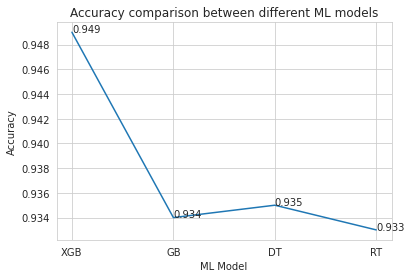

In [112]:
displayComparisonGraphsOfModels(0)

The accuracy for XGB classiffier works best after fitting the data without any preprocessing.

**WITH PCA AND STANDARD SCALER**

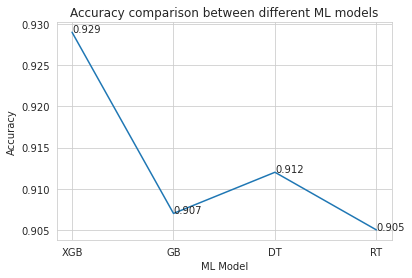

In [113]:
displayComparisonGraphsOfModels(1)


The accuracy for XGB classifier works best after fitting the data with preprocessing by applying PCA and standard scaler.However, we can see the accuracy has reduced from the previous case.



**WITH REMOVING CORRELATION (AMONG FEATURES) AND MINMAX SCALING**

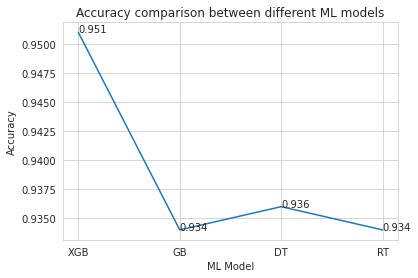

In [114]:
displayComparisonGraphsOfModels(2)

The accuracy for XGB classifier works best after fitting the data with preprocessing by applying Correlation analysis and MinMax scaling.We can see the accuracy has increased from the previous case.


**WITH MINMAX SCALING**



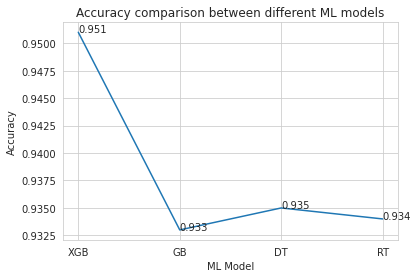

In [115]:
displayComparisonGraphsOfModels(3)

**WITH STANDARD SCALING**


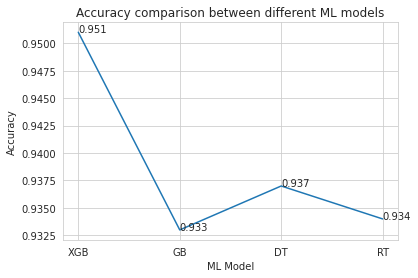

In [116]:
displayComparisonGraphsOfModels(4)

**WITH STANDARD SCALING AND CORRELATION**

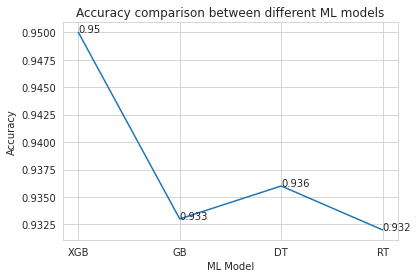

In [117]:
displayComparisonGraphsOfModels(5)




---





In [123]:
list1=["XGB","GB","DT","RT"]
df = pd.DataFrame(list1, columns=['Model'])
df['accuracy_without_preprocessing'] = [acc_rf[0], acc_gb[0], acc_dt[0], acc_xgb[0]]
df['accuracy_with_pca_standardscaler'] = [acc_rf[1], acc_gb[1], acc_dt[1], acc_xgb[1]]
df['accuracy_with_minmax_correlation'] = [acc_rf[2], acc_gb[2], acc_dt[2], acc_xgb[2]]
df['accuracy_with_minmax'] = [acc_rf[3], acc_gb[3], acc_dt[3], acc_xgb[3]]
df['accuracy_with_standardscaler'] = [acc_rf[4], acc_gb[4], acc_dt[4], acc_xgb[4]]
df['accuracy_with_standardscaler_correlation'] = [acc_rf[5], acc_gb[5], acc_dt[5], acc_xgb[5]]

In [124]:
df

,Model,accuracy_without_preprocessing,accuracy_with_pca_standardscaler,accuracy_with_minmax_correlation,accuracy_with_minmax,accuracy_with_standardscaler,accuracy_with_standardscaler_correlation
0,XGB,0.949,0.929,0.951,0.951,0.951,0.950
1,GB,0.934,0.907,0.934,0.933,0.933,0.933
2,DT,0.935,0.912,0.936,0.935,0.937,0.936
3,RT,0.933,0.905,0.934,0.934,0.934,0.932
